# This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')


#### Data Sourcing

Reading the csv files available for this case


In [2]:
applicationCurrent = pd.read_csv("application_data.csv")
applicationPrev    = pd.read_csv("previous_application.csv")


#### Quick glimpse of the structure and its content

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', 50)


In [4]:
print(applicationCurrent.head())
print(applicationCurrent.shape)

   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1     

### Data cleaning

Checking for missing values

In [5]:
colWithNull = applicationCurrent.columns[applicationCurrent.isnull().mean()>0.0]
applicationCurrent[colWithNull].isnull().mean().round(4)

AMT_ANNUITY                   0.0000
AMT_GOODS_PRICE               0.0009
NAME_TYPE_SUITE               0.0042
OWN_CAR_AGE                   0.6599
OCCUPATION_TYPE               0.3135
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     0.1350
AMT_REQ_CREDIT_BUREAU_WEEK    0.1350
AMT_REQ_CREDIT_BUREAU_MON     0.1350
AMT_REQ_CREDIT_BUREAU_QRT     0.1350
AMT_REQ_CREDIT_BUREAU_YEAR    0.1350
Length: 67, dtype: float64

In [6]:
#Finding columns with more 10% missing values

applicationCurrent.columns[applicationCurrent.isnull().mean()>0.1]

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMEN

All the columns ,except OCCUPATION_TYPE, with more than 15% do not seem to be of immediate importance hence going to drop.



In [7]:
# Checking null percentage specifically for OCCUPATION_TYPE as it may be a an important column
applicationCurrent.OCCUPATION_TYPE.isnull().mean()


0.31345545362604915

31% missing is a very significant number, but since 70% of 307511 is 215257 which is a reasonably large number for possible significant insight. We will impute this with missing value.

In [8]:
# Having a view of the composition of Occupation column

(100*applicationCurrent.groupby(['OCCUPATION_TYPE']).OCCUPATION_TYPE.count()/applicationCurrent.shape[0]).round(2)

OCCUPATION_TYPE
Accountants               3.19
Cleaning staff            1.51
Cooking staff             1.93
Core staff                8.97
Drivers                   6.05
HR staff                  0.18
High skill tech staff     3.70
IT staff                  0.17
Laborers                 17.95
Low-skill Laborers        0.68
Managers                  6.95
Medicine staff            2.78
Private service staff     0.86
Realty agents             0.24
Sales staff              10.44
Secretaries               0.42
Security staff            2.19
Waiters/barmen staff      0.44
Name: OCCUPATION_TYPE, dtype: float64

NOTE on missing values in OCCUPATION_TYPE:

Compared to the percentage composition of the Occupation column,
Missing 31% is very significant and cannot be treated as one group,
but we ll replace it with "Missing" to ensure that we can still uncover relation of
Occupation with other variable and values.

##### Replace null values in Occupation with " Missing"

In [1]:
applicationCurrent['OCCUPATION_TYPE'].fillna(value = "Missing", inplace =True)

NameError: name 'applicationCurrent' is not defined

In [10]:
applicationCurrent.OCCUPATION_TYPE.isnull().mean()
# Zero nulls in Occupation_Type

0.0

##### Dropping the columns with more than 10% NULL

In [11]:
highMissingCol = applicationCurrent.columns[applicationCurrent.isnull().mean()>0.1]
highMissingCol

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVIN

In [12]:
#exploring the few column Types that may be relevant

(100*applicationCurrent[['APARTMENTS_AVG','OWN_CAR_AGE','YEARS_BUILD_MODE']].isnull().mean()).round(2)




APARTMENTS_AVG      50.75
OWN_CAR_AGE         65.99
YEARS_BUILD_MODE    66.50
dtype: float64

##### Note
Shows high NULL percentage, hence will exclude as plan


In [13]:
cleanCurrent = applicationCurrent.drop(highMissingCol, axis = 1, inplace =False)

cleanCurrent

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,0,1,1,0,Missing,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3

In [14]:
# Check for missing percentage above 10% again 

cleanCurrent.columns[cleanCurrent.isnull().mean() >0.1]

Index([], dtype='object')

##### Handling the remaining Missing values

Examining the remaining missing values

In [15]:

colWithNull = cleanCurrent.columns[cleanCurrent.isnull().mean() >0.0]

cleanCurrent[colWithNull].isnull().mean().round(4)

AMT_ANNUITY                 0.0000
AMT_GOODS_PRICE             0.0009
NAME_TYPE_SUITE             0.0042
CNT_FAM_MEMBERS             0.0000
EXT_SOURCE_2                0.0021
OBS_30_CNT_SOCIAL_CIRCLE    0.0033
DEF_30_CNT_SOCIAL_CIRCLE    0.0033
OBS_60_CNT_SOCIAL_CIRCLE    0.0033
DEF_60_CNT_SOCIAL_CIRCLE    0.0033
DAYS_LAST_PHONE_CHANGE      0.0000
dtype: float64

##### NOTE
1. NAME_TYPE_SUITE  to be dropped because the name of the person accompanying will be of no relevance in analysing the credit risk of loan applicants

2. Also Delete EXT_Source_2 as it is a score for the database source


#### Dropping NAME_TYPE_SUITE


In [16]:
#Dropped NameTypeSuite
cleanCurrent.drop(['NAME_TYPE_SUITE', 'EXT_SOURCE_2'], axis=1, inplace=True)

##### For the remaining columns with NULL values

1. We can try and impute if possible without exaggerating or dataloss
2. Else we will delete the rows as the % are less than approx 3% , the overall effect on the analysis is unlikely to be significant

##### Checking the spread of remaining columns with NULL

In [17]:
# Checking the spread of the columns with NULL
cleanCurrent[cleanCurrent.columns[cleanCurrent.isnull().mean() >0.0]].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,307499.000000,3.072330e+05,307509.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000
mean,27108.573909,5.383962e+05,2.152665,1.422245,0.143421,1.405292,0.100049,-962.858788
std,14493.737315,3.694465e+05,0.910682,2.400989,0.446698,2.379803,0.362291,826.808487
min,1615.500000,4.050000e+04,1.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,16524.000000,2.385000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000
50%,24903.000000,4.500000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,-757.000000
75%,34596.000000,6.795000e+05,3.000000,2.000000,0.000000,2.000000,0.000000,-274.000000
max,258025.500000,4.050000e+06,20.000000,348.000000,34.000000,344.000000,24.000000,0.000000


###### NOTE:

Will not impute as it risks introducing biases. Instead it is better to delete these rows as we will still have sufficiently large data for overall analysis 

In [18]:
# Removing the rows with NULL

nullCol=cleanCurrent.columns[cleanCurrent.isnull().mean() >0.00]

cleanCurrent.dropna(subset = nullCol, inplace =True)


In [19]:
# Checking for the dropping result
cleanCurrent.columns[cleanCurrent.isnull().mean() >0.00]

Index([], dtype='object')

In [20]:
# Also Checking for remaing rows
cleanCurrent.shape[0]/applicationCurrent.shape[0]

0.9957334859565999

In [21]:
#checking for any NULL in the entire dataFrame
cleanCurrent.isnull().mean().sum() 


0.0

#### Post Missing values handling Result

1. We still have retained 99.57% of rows
2. No Occurence of Null in the entire result dataFrame

#### Data Cleaning: Removal of irrelevant rows Columns

In [22]:
cleanCurrent.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


All the columns in the resultant dataframe,  can possibly show some useful insights with respect to credit risk analysis.
Hence, going to assume all the columns at this stage is relevant.

##### Data Cleaning: Standardization - Data Types

Checking consistency of data types in the columns

In [23]:
cleanCurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 64 columns):
SK_ID_CURR                     306199 non-null int64
TARGET                         306199 non-null int64
NAME_CONTRACT_TYPE             306199 non-null object
CODE_GENDER                    306199 non-null object
FLAG_OWN_CAR                   306199 non-null object
FLAG_OWN_REALTY                306199 non-null object
CNT_CHILDREN                   306199 non-null int64
AMT_INCOME_TOTAL               306199 non-null float64
AMT_CREDIT                     306199 non-null float64
AMT_ANNUITY                    306199 non-null float64
AMT_GOODS_PRICE                306199 non-null float64
NAME_INCOME_TYPE               306199 non-null object
NAME_EDUCATION_TYPE            306199 non-null object
NAME_FAMILY_STATUS             306199 non-null object
NAME_HOUSING_TYPE              306199 non-null object
REGION_POPULATION_RELATIVE     306199 non-null float64
DAYS_BIRTH             

##### NOTE:

DAYS_REGISTRATION , CNT_FAM_MEMBERS, OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE  

to be all changed to type int

In [24]:
cleanCurrent.astype({'DAYS_REGISTRATION':'int64' , 'CNT_FAM_MEMBERS' : 'int64', 'OBS_30_CNT_SOCIAL_CIRCLE': 'int64','DEF_30_CNT_SOCIAL_CIRCLE':'int64', 'OBS_60_CNT_SOCIAL_CIRCLE':'int64','DEF_60_CNT_SOCIAL_CIRCLE':'int64'})

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456,-1982,1,1,0,1,0,0,Sales staff,1,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0,0,0,0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388,-4090,1,0,0,1,1,0,Missing,1,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737,-5150,1,1,0,1,0,1,Managers,1,3,3,THURSDAY,9,0,0,0,0,1,1,School,6,0,6,0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562,-931,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0,0,0,0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Datatypes chanaged to integers 
as they are in float

In [25]:
col =['DAYS_REGISTRATION' , 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_EMPLOYED']

cleanCurrent[col] = cleanCurrent[col].astype('int64')

In [26]:
cleanCurrent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 64 columns):
SK_ID_CURR                     306199 non-null int64
TARGET                         306199 non-null int64
NAME_CONTRACT_TYPE             306199 non-null object
CODE_GENDER                    306199 non-null object
FLAG_OWN_CAR                   306199 non-null object
FLAG_OWN_REALTY                306199 non-null object
CNT_CHILDREN                   306199 non-null int64
AMT_INCOME_TOTAL               306199 non-null float64
AMT_CREDIT                     306199 non-null float64
AMT_ANNUITY                    306199 non-null float64
AMT_GOODS_PRICE                306199 non-null float64
NAME_INCOME_TYPE               306199 non-null object
NAME_EDUCATION_TYPE            306199 non-null object
NAME_FAMILY_STATUS             306199 non-null object
NAME_HOUSING_TYPE              306199 non-null object
REGION_POPULATION_RELATIVE     306199 non-null float64
DAYS_BIRTH             

##### Data cleaning : Standardisation of values in the columns

1. Converting the DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLIS into absolute values

2. converting DAYS_BIRTH,DAYS_EMPLOYED to years

In [27]:
col = ['DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

cleanCurrent[col] = cleanCurrent[col].abs()
cleanCurrent[col]


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461.0,637.0,3648.0,2120.0,1134.0
1,16765.0,1188.0,1186.0,291.0,828.0
2,19046.0,225.0,4260.0,2531.0,815.0
3,19005.0,3039.0,9833.0,2437.0,617.0
4,19932.0,3038.0,4311.0,3458.0,1106.0
...,...,...,...,...,...
307506,9327.0,236.0,8456.0,1982.0,273.0
307507,20775.0,365243.0,4388.0,4090.0,0.0
307508,14966.0,7921.0,6737.0,5150.0,1909.0
307509,11961.0,4786.0,2562.0,931.0,322.0


In [28]:
#Converting dAys of birth to age & Day employed to age
col = ['DAYS_BIRTH','DAYS_EMPLOYED']
cleanCurrent[col]=(cleanCurrent[col]/365).round(0)
cleanCurrent[col]

,DAYS_BIRTH,DAYS_EMPLOYED
0,26.0,2.0
1,46.0,3.0
2,52.0,1.0
3,52.0,8.0
4,55.0,8.0
...,...,...
307506,26.0,1.0
307507,57.0,1001.0
307508,41.0,22.0
307509,33.0,13.0


In [29]:
#Renaming Days of Birth to Age, Day Employed to EmployedYears

cleanCurrent.rename(columns = {'DAYS_BIRTH': 'Age', 'DAYS_EMPLOYED' : 'EmployedYears'}, inplace=True)


In [30]:
cleanCurrent.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Age,EmployedYears,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2.0,3648.0,2120.0,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46.0,3.0,1186.0,291.0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1.0,4260.0,2531.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8.0,9833.0,2437.0,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8.0,4311.0,3458.0,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


###### Note
For now:
1. NO column seem to need further splittting or rearrangement
2. All rows are unique based on SK_ID_CURR

We may need to change days of birth to more readable 'age' but we can do that during plotting or after merging the remaining files as the analysis demands.

#### Data Celaning - Data Standardisation : Unit conversions


###### Changing amount values to Lakhs




In [31]:
col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
cleanCurrent[col] = (cleanCurrent[col])/10**5

cleanCurrent[col]=cleanCurrent[col].round(4)

cleanCurrent[col]



,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
0,2.025,4.0660,0.2470,3.510
1,2.700,12.9350,0.3570,11.295
2,0.675,1.3500,0.0675,1.350
3,1.350,3.1268,0.2969,2.970
4,1.215,5.1300,0.2187,5.130
...,...,...,...,...
307506,1.575,2.5470,0.2756,2.250
307507,0.720,2.6955,0.1200,2.250
307508,1.530,6.7766,0.2998,5.850
307509,1.710,3.7011,0.2020,3.195


#### Data Cleaning : Outliers check 

For the numerical columns

In [32]:
cleanCurrent.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,Age,EmployedYears,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.0,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000,306199.000000
mean,278170.022384,0.080889,0.417101,1.686648,5.997997,0.271351,5.386775,0.020849,43.946313,185.745874,4986.236301,2994.690061,1.0,0.819751,0.199508,0.998148,0.281183,0.056767,2.152950,2.053083,2.032107,12.060493,0.015150,0.050725,0.040578,0.078207,0.230572,0.179638,1.422444,0.143433,1.405498,0.100049,963.489812,0.000042,0.712726,0.000082,0.014670,0.088420,0.000137,0.081679,0.003877,0.000020,0.003929,0.000007,0.003540,0.002949,0.001212,0.009967,0.000268,0.008161,0.000598,0.000509,0.000327
std,102785.945154,0.272664,0.722198,2.373632,4.025770,0.144773,3.694586,0.013810,11.962589,382.279811,3522.952963,1509.211085,0.0,0.384395,0.399631,0.042992,0.449577,0.231397,0.910659,0.508830,0.502573,3.265589,0.122151,0.219436,0.197311,0.268498,0.421200,0.383886,2.401191,0.446731,2.380019,0.362282,827.105308,0.006516,0.452491,0.009035,0.120229,0.283905,0.011711,0.273875,0.062141,0.004427,0.062557,0.002556,0.059394,0.054225,0.034787,0.099338,0.016362,0.089971,0.024440,0.022566,0.018069
min,100002.000000,0.000000,0.000000,0.256500,0.450000,0.016200,0.405000,0.000290,21.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189137.500000,0.000000,0.000000,1.125000,2.700000,0.165700,2.385000,0.010006,34.000000,3.000000,2010.000000,1721.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278197.000000,0.000000,0.000000,1.462500,5.175000,0.249400,4.500000,0.018850,43.000000,6.000000,4504.000000,3255.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,758.000000,0.000000,1.000000,0.000000,0.000000,0.00000

##### The following 4 types of outliers observed

1. Valid Outliers : Wont remove but use analysis that wont be affected by such outliers, we can possibly bin if the analysis demands. We will Bin few of them

    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'

2. Unlikely to be outliers: Need to investigate, if not valid, Delete else we can bin the spread
    'CNT_FAM_MEMBERS', . May be valid but very high


3. Doubtful data or inapplicability of numeric analysis: Need to investigate 

 there seem to be data issue as all quartiles are zero but mean is some value
 
    'OBS_30_CNT_SOCIAL_CIRCLE'.'DEF_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'.


4. Wrong enteries or illogical values 

    DAYS_Employed --- MAX value is meaningless  ( 1000 years)
    DAYS- REGISTRATION -- Max value Meaningless  - 67 years.. unlikely.. More than max AGE

##### Investigate CNT_FAM_MEMBERS

<function matplotlib.pyplot.show(*args, **kw)>

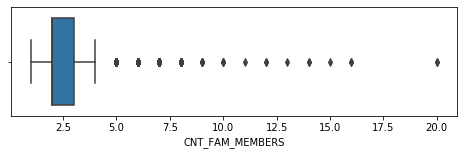

In [33]:

plt.figure(figsize=(8,2))
sns.boxplot(cleanCurrent.CNT_FAM_MEMBERS)
plt.show


The significant values are limited to around 4

But since the outliers are possible and valid input, besides being an important variable that defines such outliers. We will retain these values

##### Binning  Income level to handle outliers

<function matplotlib.pyplot.show(*args, **kw)>

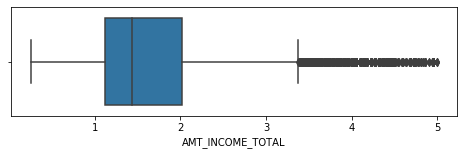

In [34]:
plt.figure(figsize=(8,2))
sns.boxplot(cleanCurrent.AMT_INCOME_TOTAL[cleanCurrent.AMT_INCOME_TOTAL < 5])
plt.show

In [35]:
bins = [0,1,1.5,2,3.5,1000]
label = ['Low','Below Avg','Avg','Above Avg','High']
cleanCurrent['Income_Group'] = pd.cut(cleanCurrent.AMT_INCOME_TOTAL,bins, labels = label)
cleanCurrent['Income_Group']

0         Above Avg
1         Above Avg
2               Low
3         Below Avg
4         Below Avg
            ...    
307506          Avg
307507          Low
307508          Avg
307509          Avg
307510          Avg
Name: Income_Group, Length: 306199, dtype: category
Categories (5, object): [Low < Below Avg < Avg < Above Avg < High]

##### Investigating OBS_30s & OBS_60s


As seen in the initial data describe info, these nature of these columns are not clear

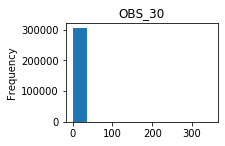

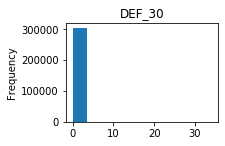

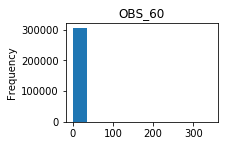

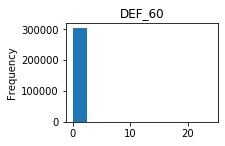

In [36]:

plt.subplot(2,2,1)
cleanCurrent.OBS_30_CNT_SOCIAL_CIRCLE.plot.hist()
plt.title("OBS_30")
plt.show()

plt.subplot(2,2,2)
cleanCurrent.DEF_30_CNT_SOCIAL_CIRCLE.plot.hist()
plt.title("DEF_30")
plt.show()

plt.subplot(2,2,3)
cleanCurrent.OBS_60_CNT_SOCIAL_CIRCLE.plot.hist()
plt.title("OBS_60")
plt.show()

plt.subplot(2,2,4)
cleanCurrent.DEF_60_CNT_SOCIAL_CIRCLE.plot.hist()
plt.title("DEF_60")
plt.show()



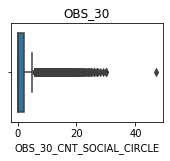

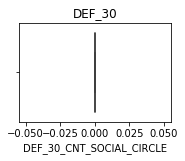

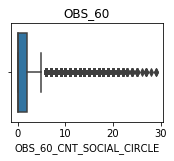

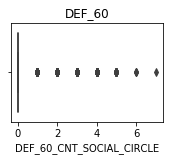

In [37]:
plt.subplot(2,2,1)
sns.boxplot(cleanCurrent.OBS_30_CNT_SOCIAL_CIRCLE[cleanCurrent.OBS_30_CNT_SOCIAL_CIRCLE < 50])
plt.title("OBS_30")
plt.show()

plt.subplot(2,2,2)
sns.boxplot(cleanCurrent.DEF_30_CNT_SOCIAL_CIRCLE[cleanCurrent.DEF_30_CNT_SOCIAL_CIRCLE < 1])
plt.title("DEF_30")
plt.show()

plt.subplot(2,2,3)
sns.boxplot(cleanCurrent.OBS_60_CNT_SOCIAL_CIRCLE[cleanCurrent.OBS_60_CNT_SOCIAL_CIRCLE < 30])
plt.title("OBS_60")
plt.show()

plt.subplot(2,2,4)
sns.boxplot(cleanCurrent.DEF_60_CNT_SOCIAL_CIRCLE[cleanCurrent.DEF_60_CNT_SOCIAL_CIRCLE < 10])
plt.title("DEF_60")
plt.show()

##### Drop Client surrounding data
As noticed  here, spread of these columns are extremely thin or of single value ( more like a binary column), which is in contradiction to what is expected as per column description.
Also due to thin data spread, dont have much information to analyse upon.
We are not clear the significance of these columns 

hence remove these columns

In [38]:
col = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
cleanCurrent.drop(col, axis =1, inplace =True )

In [39]:
cleanCurrent.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'Age', 'EmployedYears',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUME

In [40]:
cleanCurrent.EmployedYears.describe()

count    306199.000000
mean        185.745874
std         382.279811
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: EmployedYears, dtype: float64

Note:
Huge difference between 75% and Max value.
Huge outliers

In [41]:
cleanCurrent['EmployedYears'] = cleanCurrent['EmployedYears'].astype('int64')

##### Investigating Outilers with invalid values

Employed Years

In [42]:
# Checking the spread of topmost qaurtile
cleanCurrent.EmployedYears[cleanCurrent['EmployedYears'] < 50].describe()

count    251019.000000
mean          6.533454
std           6.412624
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: EmployedYears, dtype: float64


#### Note  : Removal of outliers
Considering longest period of employment as 49 years.

Remove all row with values above 49

In [43]:
cleanCurrent = cleanCurrent[cleanCurrent.EmployedYears < 50]

In [44]:
cleanCurrent.EmployedYears.describe()

count    251019.000000
mean          6.533454
std           6.412624
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          49.000000
Name: EmployedYears, dtype: float64

##### Investigating DAYS_REGISTRATION

In [45]:
# Investigating DAYS_REGISTRATION

cleanCurrent.DAYS_REGISTRATION.describe()

count    251019.000000
mean       4634.874643
std        3251.927805
min           0.000000
25%        1845.000000
50%        4264.000000
75%        6950.500000
max       22928.000000
Name: DAYS_REGISTRATION, dtype: float64

##### NOTE on Outliers for DAYS_REGISTRATION
1. Huge gap between the Intial 75% Quartile and the max value
2. Drilling down the 75% quartile to indentify when the outliers actually start
3. Cummulatively checking the spread of 75% quartile until we see the darstic shift in the value


In [46]:
# Checking the spread of upper Quartile of original upper quartile

cleanCurrent.DAYS_REGISTRATION[cleanCurrent.DAYS_REGISTRATION > 9967].describe()

count    16296.000000
mean     11503.592661
std       1417.967278
min       9968.000000
25%      10419.000000
50%      11097.500000
75%      12194.000000
max      22928.000000
Name: DAYS_REGISTRATION, dtype: float64

So 12128 day as the upper cut for meaningful DAYS_REGISTRATION

Remove rows with DAYS_REGISTRATION above 12128

In [47]:
# Checking the above operation
cleanCurrent = cleanCurrent[cleanCurrent.DAYS_REGISTRATION < 12130]
cleanCurrent.DAYS_REGISTRATION.describe()


count    246767.000000
mean       4483.136493
std        3061.161478
min           0.000000
25%        1804.000000
50%        4194.000000
75%        6775.000000
max       12129.000000
Name: DAYS_REGISTRATION, dtype: float64

In [48]:
#Checking for retained rows

print(cleanCurrent.shape)

print(round(cleanCurrent.shape[0]/applicationCurrent.shape[0],3))

(246767, 61)
0.802


###### Post Cleaning Note:

1. No NULL values
2. Datatypes set for each columns
3. Values have been standardised
4. Outliers have been analysed and handled
5. We have retained 80% rows a



#### ANALYSIS

###### 1. Imbalance check

In [49]:
cleanCurrent.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,Age,EmployedYears,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Income_Group
0,100002,1,Cash loans,M,N,Y,0,2.025,4.0660,0.2470,3.510,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26.0,2,3648.0,2120.0,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Above Avg
1,100003,0,Cash loans,F,N,N,0,2.700,12.9350,0.3570,11.295,State servant,Higher education,Married,House / apartment,0.003541,46.0,3,1186.0,291.0,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Above Avg
2,100004,0,Revolving loans,M,Y,Y,0,0.675,1.3500,0.0675,1.350,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.0,1,4260.0,2531.0,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Low
3,100006,0,Cash loans,F,N,Y,0,1.350,3.1268,0.2969,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.0,8,9833.0,2437.0,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Below Avg
4,100007,0,Cash loans,M,N,Y,0,1.215,5.1300,0.2187,5.130,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55.0,8,4311.0,3458.0,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Below Avg


In [50]:
# checking the imbalance % percentage in Target

cleanCurrent.groupby("TARGET").SK_ID_CURR.count()/cleanCurrent.shape[0]

TARGET
0    0.912792
1    0.087208
Name: SK_ID_CURR, dtype: float64

##### Data Balance check Note

People with paying difficulties are a very small minority.

The data set will be biased by people who have no paying difficulties.

Imabalance handling needed

##### Analysis Target 1 & Target 0

Segregating the dataset for Paying difficulties and Non Paying Difficulties

In [51]:
#Splitting based on Target 1 and Target 0


T1Current =  cleanCurrent[cleanCurrent.TARGET == 1]
T0Current =  cleanCurrent[cleanCurrent.TARGET == 0]


In [52]:
# CHECKING FOR SPLIT and Data loss, as well as the shapes

print("T1Current")
print(T1Current.TARGET.head())
print(T1Current.shape)
print(round(T1Current.shape[0]/cleanCurrent.shape[0],4))


print("T0Current")
print(T0Current.TARGET.head())
print(T0Current.shape)
print(round(T0Current.shape[0]/cleanCurrent.shape[0],4))







T1Current
0     1
26    1
40    1
42    1
94    1
Name: TARGET, dtype: int64
(21520, 61)
0.0872
T0Current
1    0
2    0
3    0
4    0
5    0
Name: TARGET, dtype: int64
(225247, 61)
0.9128


Dataset Split successfully to Target 1 & Target 0 without any dataloss

#### Categorical unordered variables

The columns of such category type

NAME_CONTRACT_TYPE , CODE_GENDER , FLAG_OWN_CAR , NAME_CONTRACT_TYPE,FLAG_OWN_REALTY, CNT_CHILDREN
NAME_INCOME_TYPE , NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, CNT_FAM_MEMBERS , WEEKDAY_APPR_PROCESS_START , ORGANIZATION_TYPE


###### univariate analysis : profile of people having paying difficulties





In [53]:
# Percentage composition of these categorical columns
cols = ['NAME_CONTRACT_TYPE' , 'CODE_GENDER' , 'FLAG_OWN_CAR','FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'NAME_INCOME_TYPE' , 'NAME_FAMILY_STATUS','OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START' , 'ORGANIZATION_TYPE']
print("Column composition in overall Amongst People facing paying difficulties")
print()
for col in cols:
    print(col)
    print(T1Current[col].value_counts(normalize =True).sort_values(ascending=False))
    print()

Column composition in overall Amongst People facing paying difficulties

NAME_CONTRACT_TYPE
Cash loans         0.934805
Revolving loans    0.065195
Name: NAME_CONTRACT_TYPE, dtype: float64

CODE_GENDER
F    0.544563
M    0.455437
Name: CODE_GENDER, dtype: float64

FLAG_OWN_CAR
N    0.674675
Y    0.325325
Name: FLAG_OWN_CAR, dtype: float64

FLAG_OWN_REALTY
Y    0.673606
N    0.326394
Name: FLAG_OWN_REALTY, dtype: float64

NAME_HOUSING_TYPE
House / apartment      0.845307
With parents           0.080019
Municipal apartment    0.036803
Rented apartment       0.027138
Office apartment       0.006924
Co-op apartment        0.003810
Name: NAME_HOUSING_TYPE, dtype: float64

NAME_INCOME_TYPE
Working                 0.698002
Commercial associate    0.245028
State servant           0.056877
Maternity leave         0.000093
Name: NAME_INCOME_TYPE, dtype: float64

NAME_FAMILY_STATUS
Married                 0.604926
Single / not married    0.188848
Civil marriage          0.124721
Separated        

NAME_CONTRACT_TYPE


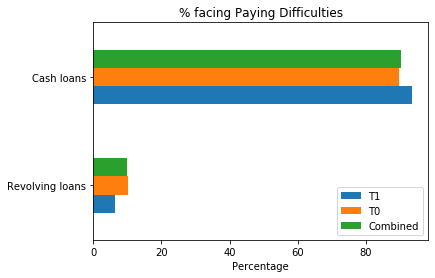


CODE_GENDER


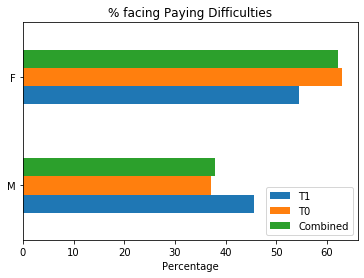


FLAG_OWN_CAR


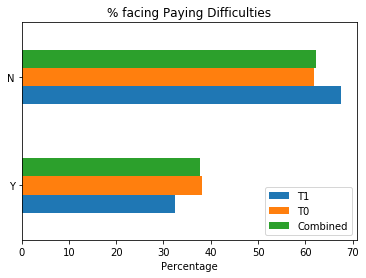


FLAG_OWN_REALTY


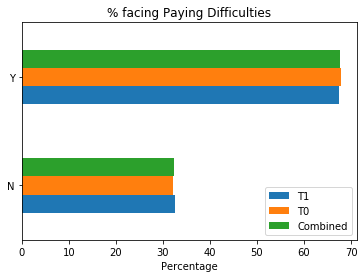


NAME_HOUSING_TYPE


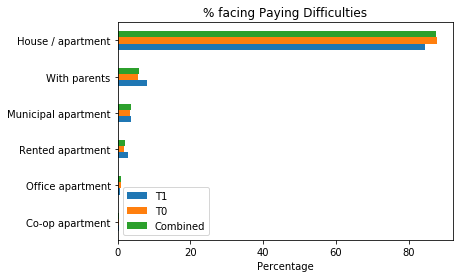


NAME_INCOME_TYPE


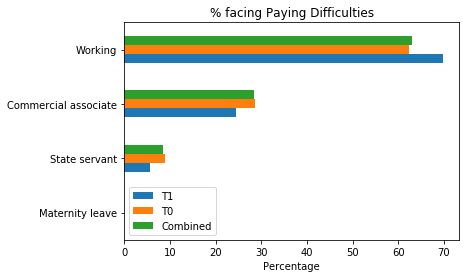


NAME_FAMILY_STATUS


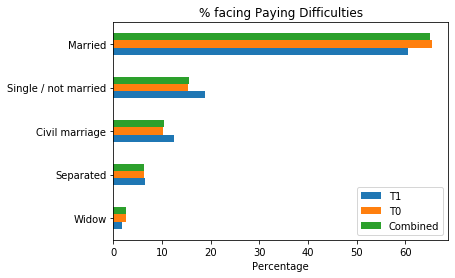


OCCUPATION_TYPE


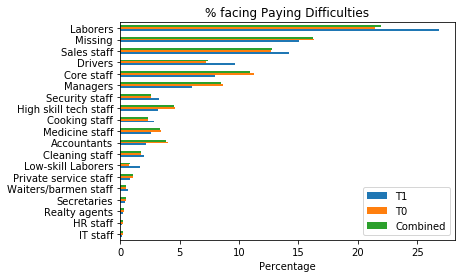


WEEKDAY_APPR_PROCESS_START


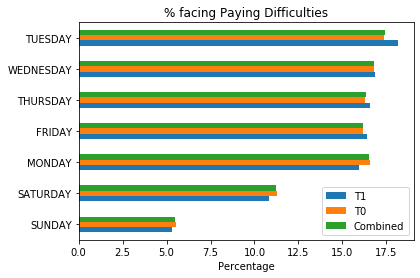


ORGANIZATION_TYPE


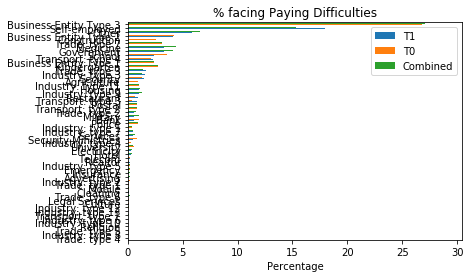

In [54]:
for col in cols:
    print(col)
    Index = T1Current[col].value_counts(normalize =True).sort_values(ascending=True).index
    T1 = 100*T1Current[col].value_counts(normalize =True).sort_values(ascending=True)
    T0 = 100*T0Current[col].value_counts(normalize =True).sort_values(ascending=True)

    allCurrent = 100*(cleanCurrent[col].value_counts(normalize =True)).sort_values(ascending=True)
    plotDf = pd.DataFrame({'T1': T1, 'T0':T0, 'Combined': allCurrent, }, index = Index)  
    plotDf.plot.barh()
    plt.xlabel("Percentage")
    plt.title("% facing Paying Difficulties")
    plt.show()
    print()

##### Note on univariate analysis of categorical distribution
**

From the above univariate analysis of the unordered categorical values

Observed:
Graphs of T0, T1 and overall dataset are more or less synched with one another. 

Ratio wise distribution between T0 and T1 are approximately same in all the cases.

All Ratio between T1 & T0 are apporximatley same as the ratios in total applicant pool

1. Higher incidence on female for paying difficulties, but higher incididence of female able to pay as well
2. Not owning a car has more incidence, but may be becuase certain type of loans like car loans are more common.No information as of now to determine that.
3. Having a house has more incidence. This may be because, house is a common collateral for loan approval.
4. Heavily skewed towards in apartments. Can be due to multiple factors but doesnt necessarily mean livig in apartments.
5. More incidence in working class but in line overall data distribution. As more working people must have qualified for loan
6. Some possible indicative of paying difficulty with Occupation type, as incidence are more in lower income group. To be confirmed later on in deeper analysis along with other variables.
7. Organisation type possibly indicative of paying capacity. To investigate deeper later on with other varibles.


Deduction:

Contract Type, Gender, Having a care, Owning a flat, number of children, income type, education type, family status, housing type, occupation, count of family, organisation type and week day of application by themselves alone
1. Upto this stage, by themselves alone do not seem to be indicative or differentiating in determining likely hood of an applicant facing financial difficulty. Except for Occupation and organisation type.

2. These variable along other attributes or columns may be indicative or inferential

3. The distribution of values within a particular column/attribute, in this case, is just the effect of demographic characteritics and nothing in particular to difficulties in paying

#### Ordered Categorical univariate analysis 




##### Ordered Categorical - Univariate Analysis

In [55]:


# Percentage composition of people facing paying difficulties

cols = ['CNT_CHILDREN','CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE']

print("Column composition in overall Amongst People facing paying difficulties")
print()
for col in cols:
    print(col)
    print(T1Current[col].value_counts(normalize =True).sort_values(ascending=False))
    print()

Column composition in overall Amongst People facing paying difficulties

CNT_CHILDREN
0     0.627463
1     0.246794
2     0.106227
3     0.016310
4     0.002509
5     0.000279
6     0.000279
9     0.000093
11    0.000046
Name: CNT_CHILDREN, dtype: float64

CNT_FAM_MEMBERS
2     0.464777
1     0.210688
3     0.209015
4     0.097351
5     0.015009
6     0.002463
7     0.000279
8     0.000279
10    0.000046
11    0.000046
13    0.000046
Name: CNT_FAM_MEMBERS, dtype: float64

NAME_EDUCATION_TYPE
Secondary / secondary special    0.778160
Higher education                 0.168216
Incomplete higher                0.039126
Lower secondary                  0.014359
Academic degree                  0.000139
Name: NAME_EDUCATION_TYPE, dtype: float64



CNT_CHILDREN


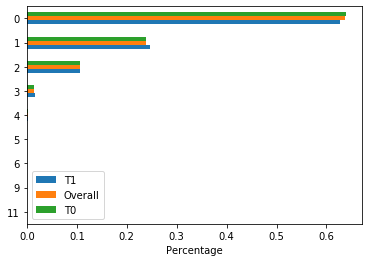


CNT_FAM_MEMBERS


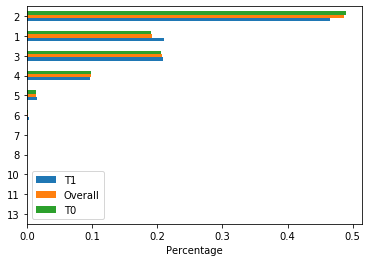


NAME_EDUCATION_TYPE


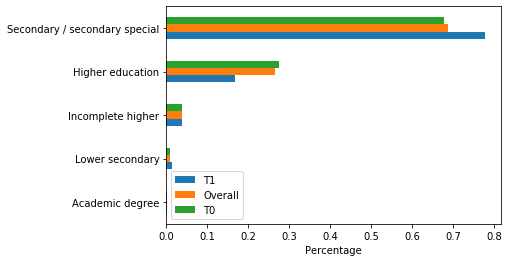

In [56]:
for col in cols:
    print(col)
    Index = T1Current[col].value_counts(normalize =True).sort_values(ascending=True).index
    T1 = T1Current[col].value_counts(normalize =True).sort_values(ascending=True)
    T0 = T0Current[col].value_counts(normalize =True).sort_values(ascending=True)

    allCurrent = cleanCurrent[col].value_counts(normalize =True).sort_values(ascending=True)
    plotDf = pd.DataFrame({'T1': T1, 'Overall': allCurrent, 'T0':T0}, index = Index)  
    plotDf.plot.barh()
    plt.xlabel("Percentage")
    plt.show()
    print()

##### Note on Ordered Categorical Variables

All the plots of Target 1, Target 0 and overall dataframe, sync with each other.

From the above plots, 
Count of Children, Count of Family and education by themselves alone are not indicative or differentiating in detemining the paying difficulties of loan applicants. High incidence are reflecting the distribution of the overall aplicants distribution

These variables along with other measures and dimensions may become significant in determining the paying difficulties of loan applicants

##### Numeric Columns - Univariate analysis

#### Univariate analysis: Income

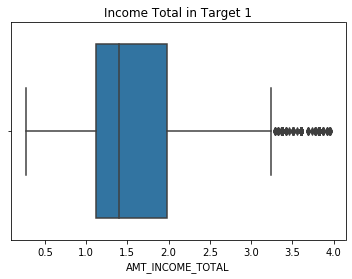

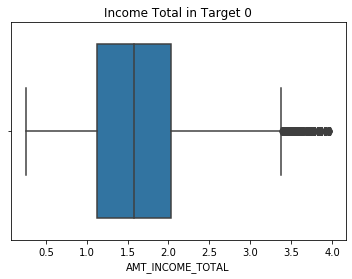

In [57]:
col = T1Current.AMT_INCOME_TOTAL[T1Current.AMT_INCOME_TOTAL <4]
sns.boxplot(col)
plt.title('Income Total in Target 1')
plt.show()

col = T0Current.AMT_INCOME_TOTAL[T0Current.AMT_INCOME_TOTAL <4]
sns.boxplot(col)
plt.title('Income Total in Target 0')
plt.show()

For income distribution similar in Target -1 and Target 0. Income alone is not indicative or differential in determining paying difficulties

#### Univariate analysis: Credit Amount

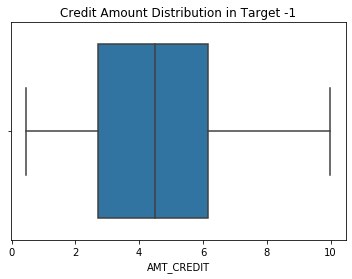

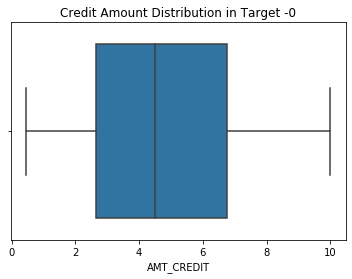

In [58]:
col = T1Current.AMT_CREDIT[T1Current.AMT_CREDIT <10]
sns.boxplot(col)
plt.title('Credit Amount Distribution in Target -1')
plt.show()

col = T0Current.AMT_CREDIT[T0Current.AMT_CREDIT <10]
sns.boxplot(col)
plt.title('Credit Amount Distribution in Target -0')
plt.show()

For Credit Amount largely similar in Target -1 and Target 0. Income alone is not indicative or differential in determining paying difficulties

#### Univariate analysis: Age

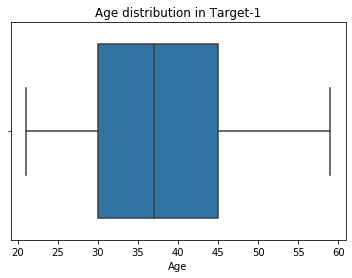

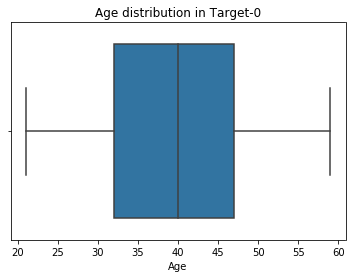

In [59]:
col = T1Current.Age[T1Current.Age <60]
sns.boxplot(col)
plt.title("Age distribution in Target-1")
plt.show()


col = T0Current.Age[T0Current.Age <60]
sns.boxplot(col)
plt.title("Age distribution in Target-0")
plt.show()

**

The median of age with paying difficulties is slightly lower at around 37 years than in Target -0 at 40 years.
The entire quartle range itself shows the similar trend

#### Univariate analysis: Employed Years

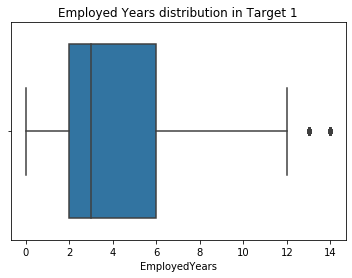

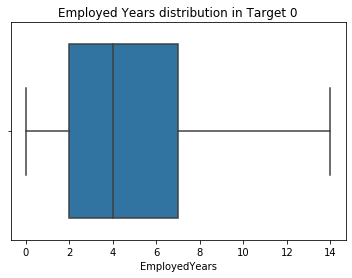

In [60]:
col = T1Current.EmployedYears[T1Current.EmployedYears <15]
sns.boxplot(col)
plt.title("Employed Years distribution in Target 1")
plt.show()

col = T0Current.EmployedYears[T0Current.EmployedYears <15]
sns.boxplot(col)
plt.title("Employed Years distribution in Target 0")
plt.show()

##### significant observation in employed years
Paying difficulties are largely ranged between 2- 6 years of emloyment.
Above 6 years employment are less risky 

####  Bivariate Analysis: Correlations




###### Age, Income, Credit,Annuity, Employed years



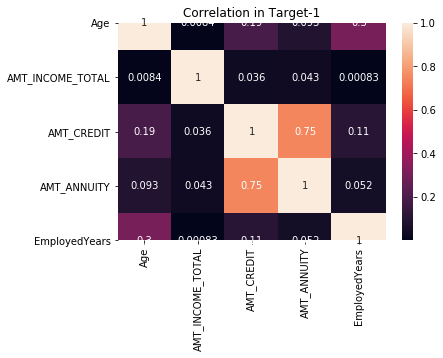

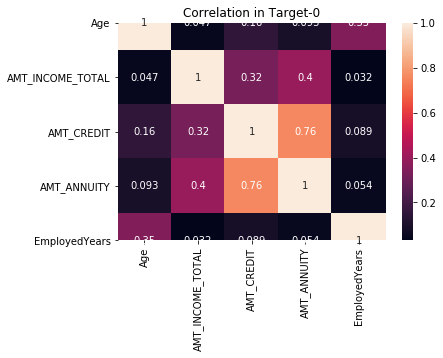

In [61]:
# Starting with Target -1

dfTemp = T1Current[['Age','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','EmployedYears']].corr()
sns.heatmap(dfTemp,annot=True)
plt.title("Correlation in Target-1")
plt.show()

# Conitnuing for Target 0
dfTemp = T0Current[['Age','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','EmployedYears']].corr()
sns.heatmap(dfTemp,annot=True)
plt.title("Correlation in Target-0")
plt.show()


##### Observation: **

Strong correlation between Annuity and Loan Credit Amount

Income and Annuity seems to be signficantly more correlated in Target-0

Income and Credit seems to be significantly more correlated in Target-0

####  Bivariate : Numeric - Numeric Analysis




Target-1


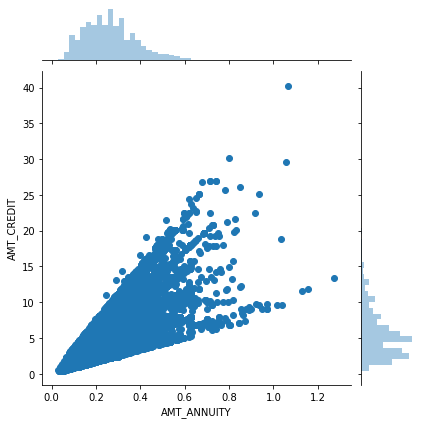

Target-0


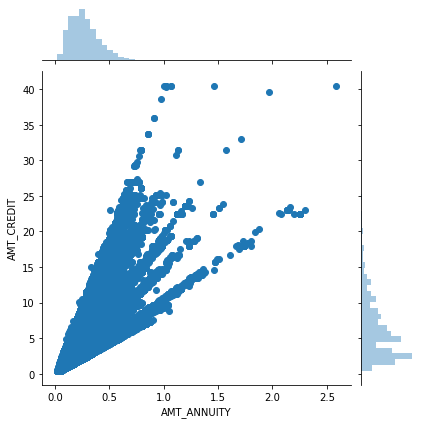

In [62]:
#Visualising Annuity Vs Loan Credit



print("Target-1")
dfTemp = T1Current
sns.jointplot('AMT_ANNUITY', 'AMT_CREDIT', dfTemp)
plt.show()

print("Target-0")
dfTemp = T0Current
sns.jointplot('AMT_ANNUITY', 'AMT_CREDIT', dfTemp)
plt.show()





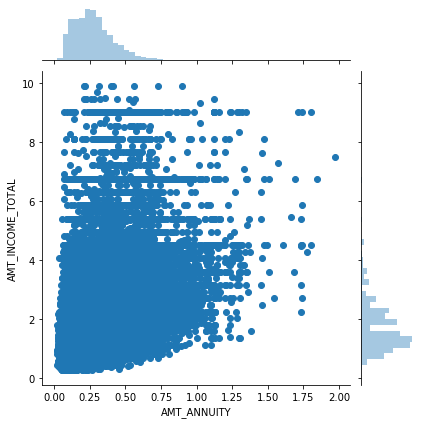

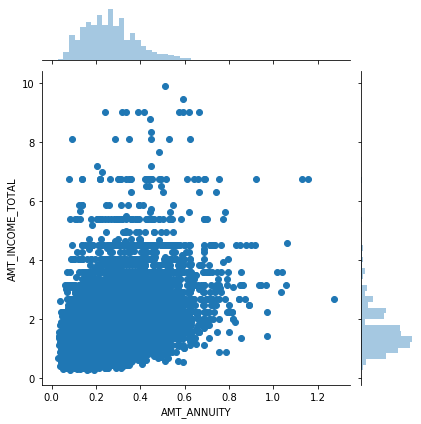

In [63]:
# Income Vs Annuity

dfTemp = T0Current[(T0Current.AMT_INCOME_TOTAL < 10) & (T0Current.AMT_ANNUITY < 2)]
sns.jointplot('AMT_ANNUITY', 'AMT_INCOME_TOTAL', dfTemp)
plt.show()



dfTemp = T1Current[(T1Current.AMT_INCOME_TOTAL < 10) & (T1Current.AMT_ANNUITY < 2)]
sns.jointplot('AMT_ANNUITY', 'AMT_INCOME_TOTAL', dfTemp)
plt.show()

NOTE: 
1. Weak correlation between AMT_INCOME_TOTAL and AMT_ANNUITY in both groups
2. It is likely that higher income may tend to afford higher annuity
3. But, income does not reflect liabilities an applicant have, hence the weak correlation




Target -1


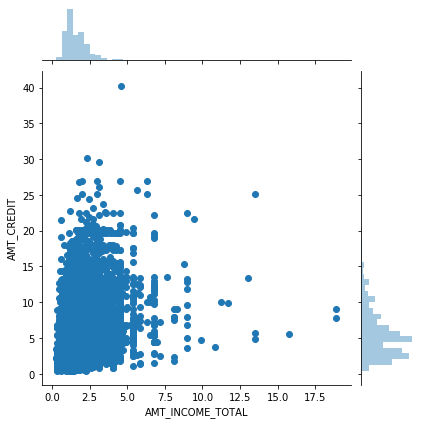

Target -0


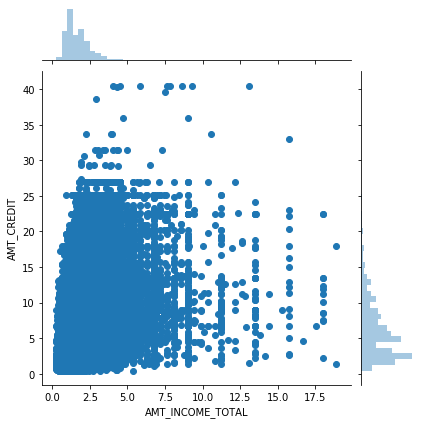

In [64]:
# AMT_INCOME_TOTAL  vs AMT_CREDIT
dfTemp1 = T1Current[(T1Current.AMT_INCOME_TOTAL < 20)]
dfTemp0 = T0Current[(T0Current.AMT_INCOME_TOTAL < 20)]


print("Target -1")
sns.jointplot( 'AMT_INCOME_TOTAL','AMT_CREDIT', dfTemp1)
plt.show()

print("Target -0")
sns.jointplot( 'AMT_INCOME_TOTAL','AMT_CREDIT', dfTemp0)
plt.show()

NOTE: 
1. Weak correlation between AMT_INCOME_TOTAL and AMT_CREDIT in both Target 1 & 0
2. It is possible that higher earning applicant need possible larger investment or can afford larger credit
2. But income alone is not reflective of current liabilities and hence weak correlation

###### Numeric-Category bivariate Analysis

Income Vs Target

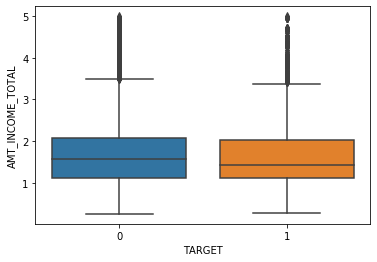

In [65]:
#plotting Income vs Target in the dataset
dfTemp = cleanCurrent[(cleanCurrent.AMT_INCOME_TOTAL < 5)]


sns.boxplot(data=dfTemp, x="TARGET" , y ='AMT_INCOME_TOTAL')
plt.show()

##### Note
1. No siginificantly distintive difference between Target 1 & 0 when it comes to Income 
2. Income interval populate between 2 and 1 lakh , countwise 

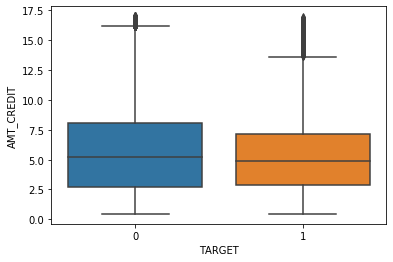

In [66]:
#credit amount Vs Defaults

dfTemp = cleanCurrent[(cleanCurrent.AMT_CREDIT < 17)]


sns.boxplot(data=dfTemp, x="TARGET" , y ='AMT_CREDIT')
plt.show()

###### Significant Observation

As seen in individual univariate analysis earlier, the inter quartile range of credit in Target-1 is a bit narrower

In [67]:
T1Current.AMT_CREDIT.describe()

count    21520.000000
mean         5.576008
std          3.459188
min          0.450000
25%          2.844000
50%          4.958800
75%          7.284600
max         40.276800
Name: AMT_CREDIT, dtype: float64

###### binning loan credits for easier anlysis

In [68]:
# Bin loan value Vs Defaults

bins = [0, 2.5, 5, 7.5, 15, 1000]
groups = T1Current.groupby(pd.cut(T1Current.AMT_CREDIT, bins))
print(100*groups.AMT_CREDIT.sum()/(T1Current.AMT_CREDIT.sum()))


bins = [0, 2.5, 5, 7.5, 15, 1000]
groups = T0Current.groupby(pd.cut(T0Current.AMT_CREDIT, bins))
print(100*groups.AMT_CREDIT.sum()/(T0Current.AMT_CREDIT.sum()))

AMT_CREDIT
(0.0, 2.5]         5.432534
(2.5, 5.0]        22.283086
(5.0, 7.5]        26.801752
(7.5, 15.0]       39.540908
(15.0, 1000.0]     5.941720
Name: AMT_CREDIT, dtype: float64
AMT_CREDIT
(0.0, 2.5]         5.192340
(2.5, 5.0]        16.835994
(5.0, 7.5]        20.452272
(7.5, 15.0]       46.353401
(15.0, 1000.0]    11.165992
Name: AMT_CREDIT, dtype: float64


##### Note   - Signifcant Observation
1. Even though the default risk by count is maximum between 2.5 to 7.5 ,  credit above 7.5 accounts for 50% of total credit value

2. From earnings point of view, above 7.5 credit accounts for more than 50% of total credit value.

So this group is both huge risk value as well as revenue segement 

##### key Category- Category Analysis



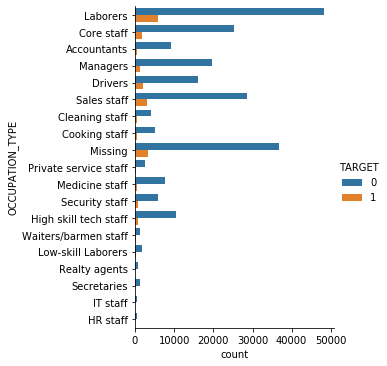

In [69]:
sns.catplot(y="OCCUPATION_TYPE", kind="count", hue = 'TARGET', data=cleanCurrent)
plt.show()



##### Note  **

Chance of defaults seem to increase with lower paying jobs.

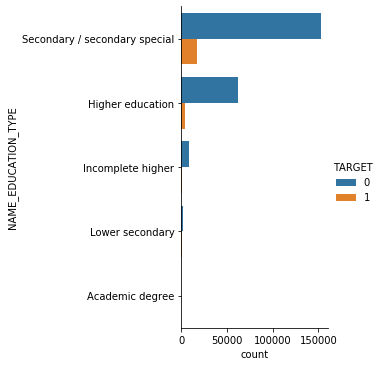

In [70]:
sns.catplot(y="NAME_EDUCATION_TYPE", kind="count", hue = 'TARGET', data=cleanCurrent)
plt.show()


##### Note

Chance of defaults concentrates around secondary educated.
But this is reflectective of the general demographic distribution

#### Merging with Previous data set

In [71]:
# Merging Previou s and current
# inner merge on SK_ID_CuRR

mDf = pd.merge(cleanCurrent, applicationPrev, how ='inner', on = 'SK_ID_CURR')

In [72]:
colTemp = applicationPrev.columns[applicationPrev.isnull().mean() ==0]
applicationPrev[colTemp].isnull().mean()

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64

In [73]:
colTemp = applicationPrev.columns[applicationPrev.isnull().mean() >.15]
applicationPrev[colTemp].isnull().mean()

AMT_ANNUITY                  0.222867
AMT_DOWN_PAYMENT             0.536365
AMT_GOODS_PRICE              0.230818
RATE_DOWN_PAYMENT            0.536365
RATE_INTEREST_PRIMARY        0.996437
RATE_INTEREST_PRIVILEGED     0.996437
NAME_TYPE_SUITE              0.491198
CNT_PAYMENT                  0.222864
DAYS_FIRST_DRAWING           0.402981
DAYS_FIRST_DUE               0.402981
DAYS_LAST_DUE_1ST_VERSION    0.402981
DAYS_LAST_DUE                0.402981
DAYS_TERMINATION             0.402981
NFLAG_INSURED_ON_APPROVAL    0.402981
dtype: float64

##### Note
we will be excluding the above columns for analysis due to high missing values

Except, CNT_PAYMENT & AMT_ANNUITY, payment terms we want to investigate, even after 20% exclusion of rows, we will still have a sizeable data to draw meaningful conclusion

We will not remove the rows but will exclude the rows whenever analysis involves these columns

In [74]:
col = ['AMT_APPLICATION','AMT_CREDIT','RATE_DOWNPAYMENT', 'CNT_PAYMENT', 'AMT_ANNUITY','NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS','CODE_REJECT_REASON']

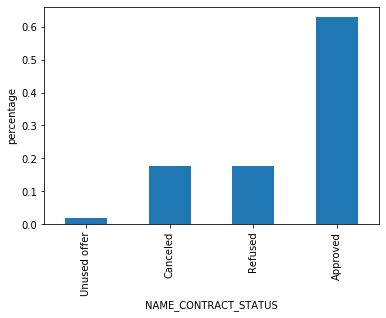

In [75]:
#LOAN Decisions
# Checking the spread of Loan approvals

(mDf.groupby('NAME_CONTRACT_STATUS').SK_ID_CURR.count()/(mDf.shape[0])).sort_values().plot(kind ='bar')
plt.ylabel('percentage')
plt.show()

##### Rejection/Acceptance Vs payment Difficutly


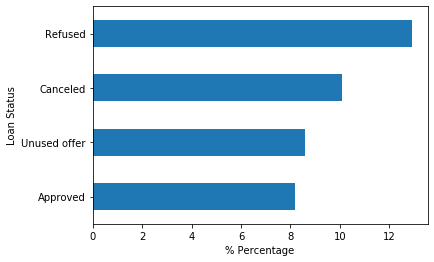

In [76]:
#REJECTION/Acceptance Vs payment Difficutly

(mDf.groupby('NAME_CONTRACT_STATUS').TARGET.mean()*100).round(1).sort_values().plot(kind="barh")
plt.xlabel("% Percentage")
plt.ylabel("Loan Status")
plt.show()

##### Note  **

History of Refusal or Canceled loan have a higher percentage of paying difficulties. But almost 90 percent of all the groups here didnt face payment difficulty. 

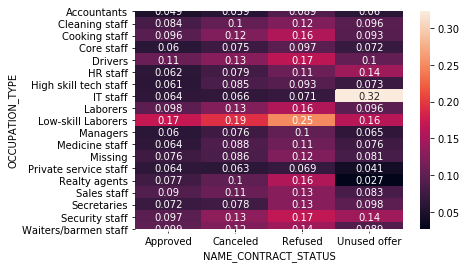

In [77]:
#Contract_Status Vs Employment Type vs Payment Difficutly

#create a pivot tabel first

dfTemp = pd.pivot_table(data=mDf, index="OCCUPATION_TYPE", columns = "NAME_CONTRACT_STATUS", values="TARGET")

sns.heatmap(dfTemp,annot=True)
plt.show()



#### Note:  **
Lower end occupation with history of Loan refusal and unused offer are at higher risk of default

##### Own House Vs Own Car Vs Payment Difficulty


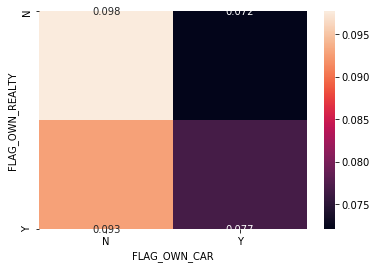

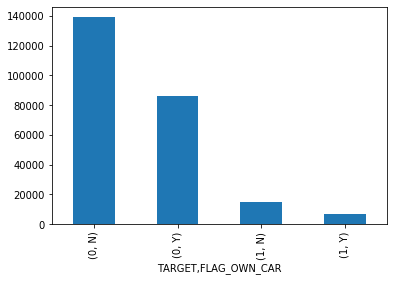

In [78]:
#FLAG_OWN_House Vs FLAG_OWN_CAR vs Payment Difficutly

#create a pivot tabel first

dfTemp = pd.pivot_table(data=cleanCurrent, index="FLAG_OWN_REALTY", columns = "FLAG_OWN_CAR", values="TARGET")

sns.heatmap(dfTemp,annot=True)
plt.show()


cleanCurrent.groupby(['TARGET','FLAG_OWN_CAR']).SK_ID_CURR.count().plot(kind ="bar")
plt.show()

NOTE: 

Not Owning a car is more risky than not owning a house

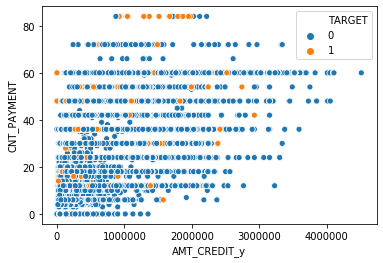

In [79]:
# Loam AMount Vs Payment Term Vs Default
sns.scatterplot(x=mDf.AMT_CREDIT_y, y=mDf.CNT_PAYMENT, hue=mDf.TARGET,  data=mDf)
plt.show()

##### Payment Terms vs default

**
Longer payment terms seem to have a higher risk of default

##### Housing Type Vs Family Status Vs Paying Dificulty

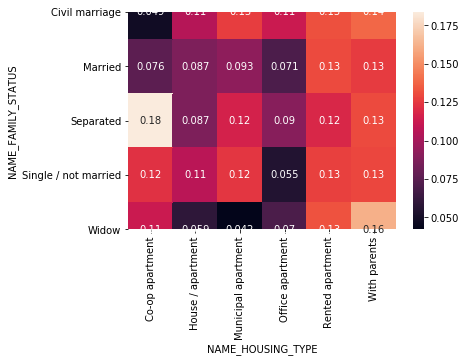

In [80]:
    
dfTemp = pd.pivot_table(data=mDf, index= 'NAME_FAMILY_STATUS', columns = 'NAME_HOUSING_TYPE', values="TARGET")

sns.heatmap(dfTemp,annot=True)
plt.show()

##### Note:

**

Separated & Living in Co-Op apartment ,Widows living with parents are more risky

People living in Rented or Parents are in generally seem to be more risky

Both Family Status and Housing Type can be indicative of payment defaults

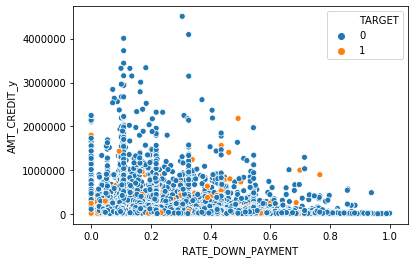

In [81]:
# RATE_DOWN_PAYMENT Vs AMT_CREDIT Vs Default
sns.scatterplot(y=mDf.AMT_CREDIT_y, x=mDf.RATE_DOWN_PAYMENT, hue=mDf.TARGET,  data=mDf)
plt.show()




#### Note:
** 

High Loan Amount with lower down payment seem face lesser payment difficulties

**

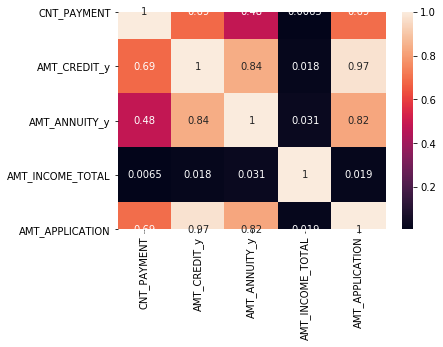

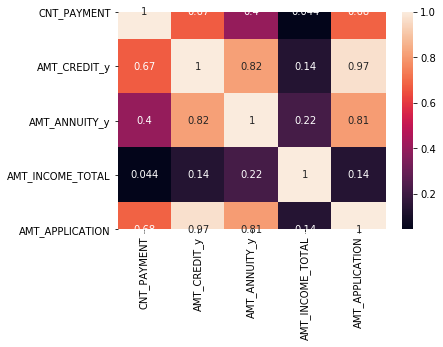

In [82]:
#Correlations

dfTempT1 = mDf[mDf.TARGET == 1]

df1 = dfTempT1[['CNT_PAYMENT', 'AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_INCOME_TOTAL', 'AMT_APPLICATION']].corr()
sns.heatmap(df1,annot=True)
plt.show()



dfTempT0 = mDf[mDf.TARGET == 0]

df0 = dfTempT0[['CNT_PAYMENT', 'AMT_CREDIT_y', 'AMT_ANNUITY_y', 'AMT_INCOME_TOTAL', 'AMT_APPLICATION']].corr()
sns.heatmap(df0,annot=True)
plt.show()



##### Note

correlation of Payment term, credit , annuity , income and applied amount are similar amongst Target 1 and 0.

In general, strong correlation between

Application amount - Credit   ( Expected and meaning the applications are largely well backed up)

almost naturally, high correlation between

Credit - Annuity   and Application amount and Annuity





### Summary


After cleaning, 246767 records or roughly 80% of the Original dataset were analysed.

Aim of the analysis was to find factors and variable interaction that could help indicate risk of payment default of EMI/annuity.

* Steps and analysis performed:
> Cleaning of data set
> 1. missing values were either imputed( Occupation) , removed( all others above 10% missing) 
> 2. Standised,  Age to years and all amount columns to lakhs, along with column names.
> 3. Data types changed to integers , for count columns as they were in float.( registration day. family count etc)
> 4. Outliers, were either removed (employed years, age ) or binned ( income, credit), depending on the validity and importance
> 5. Also checked if the columns needed any splitting or combination or needed to be tracked uniquely. None of these were required


> Analysis of current application data
> Imbalance of 91% noticed in TARGET column
> The entire data set was split into TARGET 1 and TARGET 2 for analysis to avoid biases
> Univariate , bivaruate and multivariate analysis for numeric, categorical, numeric-nuemric, nuemeric-catgeory, category-category-category  data types were conducted to investigate key possible variables
> Also the the cleaned dataset was merged with previous dataset and similar , univariate, bivaraite and multivairate analysis were conducted.


** Because of large numbers of columns, analysis were carried out only on few key columns

##### Summary of findings

1. Category data is distributed more or less same across Target 1 and Target 0 . Also the distribution is in sync with overall data set distribution, meaning as variable alone, these data are not strong indicative or differential in determinig likely payment default. ( checked variable, Income, owning car, owning house, house type, count of children, count of family 

2. ** Except 'Occupation' and 'organisation type' may have a slight differential value in determining credit risk.

2. All category datas do revolves around certain values, which are in sync with real world scenerios

3. Similar Distribution seen in numeric columns as with each alone not being a strong indicative or differential in determing credit risk.
(Income, credit amount, Age etc)

4. Age median of T1, 37 is bit youner as compared to T0 -  40

5. Above 6 years of employed years are less likely to face payment difficulty

7. Income and annuity having significantly higher correlation Income - Annuity , Income- Credit in Target 0

8. The credit Inter quartile range of Target 1 is a bit narrower 2-7 lakh
9. Credit of 7.5 and above accounts for about 50% which is beyond the interquartile range

10. Credit risk seem to populate around lower paying jobs , higher and secondary max education, 

11. As expected refused and cancelled have the max , but almost 80-90 of the refused didnt face paying difficulty.( Sign of too over strict)

12.Lower end occupation with history of Loan refusal and unused offer are at higher risk of default

13. Not Owning a car is more risky than not owning a house

14. Longer payment terms seem to have a higher risk of default

15. Separated & Living in Co-Op apartment ,Widows living with parents are more risky

16. People living in Rented or Parents are in generally seem to be more risky

17. High Loan Amount with lower down payment seem face lesser payment difficulties


18. People living in Rented or Parents are more
 risky

19. Application amount - Credit   ( Expected and meaning the applications are largely well backed up)

20. Credit - Annuity also shows high correlation , naturally this was expected
